In [1]:
import pandas as pd
import warnings
import locale
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import unicodedata
import numpy as np
import geopandas as gpd
from datetime import datetime
from geobr import read_municipality
import unicodedata

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [2]:
def remover_acentos(texto):
    return ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')

In [4]:
%%sql
SELECT 
    data, 
    numeroNotaFiscal, 
    destino, 
    procedencia, 
    cad_cidades.estado as estado,
    produto, 
    unidade, 
    unidade_peso, 
    quantidade, 
    volume,
    cad_usuarios.tipo,
    nome_usuario_sistema
FROM 
    divtec_notasfiscais
LEFT JOIN
    cad_usuarios
        ON cad_usuarios.matricula_nome = divtec_notasfiscais.destino
LEFT JOIN
    cad_cidades ON divtec_notasfiscais.procedencia = cad_cidades.cidade

,data,numeroNotaFiscal,destino,procedencia,estado,produto,unidade,unidade_peso,quantidade,volume,tipo,nome_usuario_sistema
0,2024-07-22,66122,5500971-CHS COMERCIO DE FRUTAS E,0152098-GOIANIA (GO),GOIAS,07404-TOMATE CAQUI LONGA VIDA,KG,1.000,13860.000,13860.000,ATACADISTA,Andressa
1,2024-07-22,317104,5500893-TROPICAL COMERCIO DE PRO,0143420-TRES FORQUILHAS (RS),RIO GRANDE DO SUL,08102-CENOURA,CX,20.000,210.000,4200.000,ATACADISTA,Mateus
2,2024-07-22,317104,5500893-TROPICAL COMERCIO DE PRO,0143420-TRES FORQUILHAS (RS),RIO GRANDE DO SUL,07802-BETERRABA,CX,20.000,70.000,1400.000,ATACADISTA,Mateus
3,2024-07-22,210965,5500893-TROPICAL COMERCIO DE PRO,0143370-MARIANA PIMENTEL (RS),RIO GRANDE DO SUL,10101-BATATA-DOCE,CX,20.000,150.000,3000.000,ATACADISTA,Mateus
4,2024-07-22,931754,5501039-GEAZI NEVES DA SILVA,0143370-MARIANA PIMENTEL (RS),RIO GRANDE DO SUL,10101-BATATA-DOCE,KG,1.000,8000.000,8000.000,ATACADISTA,Mateus
...,...,...,...,...,...,...,...,...,...,...,...,...
180049,2024-12-05,500408,0108717-JOSE CARLOS MELO DOS SANTOS,0143370-MARIANA PIMENTEL (RS),RIO GRANDE DO SUL,10101-BATATA-DOCE,KG,1.000,800.000,800.000,PRODUTOR,Marlon
180050,2024-12-06,133924,0112151-ADAVILSON BEHENCK HAHN,0143144-TORRES (RS),RIO GRANDE DO SUL,00503-BANANA PRATA / BRANCA,CX,20.000,32.000,640.000,PRODUTOR,Rodrigo
180051,2024-12-06,133924,0112151-ADAVILSON BEHENCK HAHN,0143144-TORRES (RS),RIO GRANDE DO SUL,00501-BANANA CATURRA / NANICA,CX,20.000,39.000,780.000,PRODUTOR,Rodrigo
180052,2024-12-05,609034,0115809-LUIZ ELEU MARTINS JUSTO,0143376-MORRINHOS DO SUL (RS),RIO GRANDE DO SUL,00503-BANANA PRATA / BRANCA,CX,20.000,220.000,4400.000,PRODUTOR,Marlon


In [5]:
dados = df.copy(deep=True)
dados['data'] = dados['data'].astype('datetime64[ns]')
dados['mes'] = dados['data'].dt.month

In [6]:
dados = dados.loc[dados['mes'] == 11]

In [7]:
dados

,data,numeroNotaFiscal,destino,procedencia,estado,produto,unidade,unidade_peso,quantidade,volume,tipo,nome_usuario_sistema,mes
122773,2024-11-01,161,5500089-L B COMERCIO DE CEREAIS,0135226-ITAPEVA (SP),SAO PAULO,07701-BATATA INGLESA,KG,1.000,15000.000,15000.000,ATACADISTA,Nicolly,11
122781,2024-11-01,7336952,5500077-COM.DE FRUTAS E LEGUMES,0150012-BATAYPORA (MS),MATO GROSSO DO SUL,02101-MELANCIA,KG,1.000,14500.000,14500.000,ATACADISTA,Nicolly,11
122795,2024-11-01,806076,0102603-JOSE LAURI BRILL,0143395-PRESIDENTE LUCENA (RS),RIO GRANDE DO SUL,04501-ALFACE,DZ,4.200,150.000,630.000,PRODUTOR,Leonardo,11
122796,2024-11-01,806076,0102603-JOSE LAURI BRILL,0143395-PRESIDENTE LUCENA (RS),RIO GRANDE DO SUL,04502-ALFACE AMERICANA,DZ,4.800,50.000,240.000,PRODUTOR,Leonardo,11
122797,2024-11-01,806076,0102603-JOSE LAURI BRILL,0143395-PRESIDENTE LUCENA (RS),RIO GRANDE DO SUL,05701-RUCULA,DZ,2.000,60.000,120.000,PRODUTOR,Leonardo,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175851,2024-11-04,50706,5500624-REICHERT COML DE FRUTAS,0143386-PARECI NOVO (RS),RIO GRANDE DO SUL,01401-LARANJA BAIA (UMBIGO),PESO,18.000,20.000,360.000,ATACADISTA,Nicolly,11
175852,2024-11-04,50706,5500624-REICHERT COML DE FRUTAS,0143386-PARECI NOVO (RS),RIO GRANDE DO SUL,02101-MELANCIA,KG,1.000,1000.000,1000.000,ATACADISTA,Nicolly,11
175853,2024-11-04,50706,5500624-REICHERT COML DE FRUTAS,0143386-PARECI NOVO (RS),RIO GRANDE DO SUL,01603-LIMAO TAITI,PESO,18.000,15.000,270.000,ATACADISTA,Nicolly,11
175854,2024-11-04,50706,5500624-REICHERT COML DE FRUTAS,0143386-PARECI NOVO (RS),RIO GRANDE DO SUL,03202-TANGERINA MURCOTT,PESO,18.000,15.000,270.000,ATACADISTA,Nicolly,11


## 5 Municípios que mais comercializaram no GNP

In [8]:
geo_cidades = read_municipality()
geo_cidades = geo_cidades.loc[geo_cidades['abbrev_state'] == 'RS']
geo_cidades['name_muni'] = geo_cidades['name_muni'].apply(lambda x : x.upper() )
geo_cidades['name_muni'] = geo_cidades['name_muni'].apply(remover_acentos)
geo_cidades = geo_cidades.rename(columns={'name_muni':'procedencia'})
geo_cidades = geo_cidades[['procedencia','geometry']]

In [13]:
df_cidade = dados.copy(deep=True)
df_cidade = df_cidade.loc[(df_cidade['tipo'] == 'PRODUTOR') & (df_cidade['estado'] == 'RIO GRANDE DO SUL')]
df_cidade =  df_cidade[['procedencia','produto','volume']]
df_cidade = df_cidade.groupby(['procedencia'])['volume'].sum().reset_index()
df_cidade = df_cidade.sort_values(by=['volume'], ascending=False)
df_cidade['volume toneladas'] = round((df_cidade['volume'] / 1000),2)
df_cidade['procedencia'] = df_cidade['procedencia'].apply(lambda x: x[8:-5])
df_cidade = df_cidade[['procedencia','volume toneladas']]
df_cidade['% do Total'] = (df_cidade['volume toneladas'] / df_cidade['volume toneladas'].sum()) * 100
df_cidade

,procedencia,volume toneladas,% do Total
8,CAXIAS DO SUL,1949.880,17.359
64,MAQUINE,714.170,6.358
80,DOM PEDRO DE ALCANTARA,631.230,5.620
68,MORRINHOS DO SUL,542.840,4.833
10,FELIZ,491.790,4.378
...,...,...,...
65,MARATA,0.340,0.003
58,TUPANDI,0.320,0.003
53,SAO DOMINGOS DO SUL,0.250,0.002
16,GUAPORE,0.190,0.002


In [14]:
cidade = 'GUAIBA'
df_cidade_produtos = dados.copy(deep=True)
df_cidade_produtos = df_cidade_produtos.loc[
	(df_cidade_produtos['tipo'] == 'PRODUTOR') & (df_cidade_produtos['estado'] == 'RIO GRANDE DO SUL')]
df_cidade_produtos =  df_cidade_produtos[['procedencia','produto','volume']]
df_cidade_produtos['procedencia'] = df_cidade_produtos['procedencia'].apply(lambda x: x[8:-5])
df_cidade_produtos['produto'] = df_cidade_produtos['produto'].apply(lambda x: x[6:])
df_cidade_produtos = df_cidade_produtos.loc[(df_cidade_produtos['procedencia'] == cidade)]
df_cidade_produtos = df_cidade_produtos.groupby(['produto'])['volume'].sum().reset_index()
df_cidade_produtos = df_cidade_produtos.sort_values(by=['volume'], ascending=False)
df_cidade_produtos['volume tonelada'] = round((df_cidade_produtos['volume'] / 1000),2)

df_cidade_produtos[['produto','volume tonelada']]

,produto,volume tonelada
1,BATATA-DOCE,72.500
7,MELAO ESPANHOL,10.000
8,MELAO GALIA / CANTALOUPE,2.000
10,PESSEGO NACIONAL,0.500
5,ESPINAFRE,0.190
0,AMEIXA NACIONAL,0.100
2,CHEIRO VERDE / TEMPERO,0.090
4,ERVAS AROMATICAS,0.030
9,MOSTARDA,0.020
3,COUVE,0.020


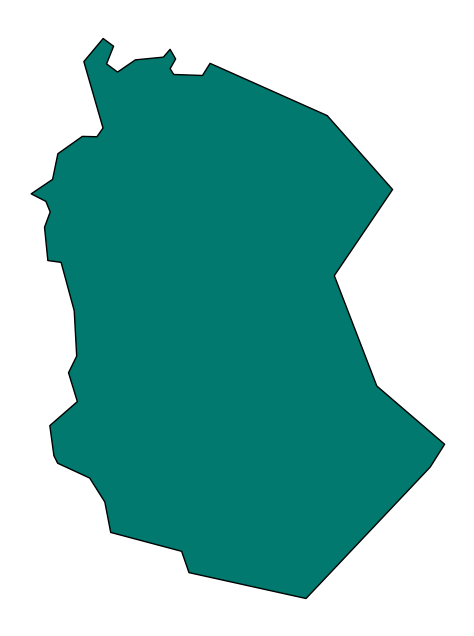

In [30]:
sns.set_theme(style='white')
ax = geo_cidades.loc[geo_cidades['procedencia'] == cidade].plot(
	edgecolor='black', figsize=(15, 8), color='#01796F'
)
sns.despine(sns.despine(bottom=True), left=True)
# Remover a legenda
ax.legend().set_visible(False)

# Remover os eixos e escalas
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()

# plt.show()
plt.savefig(f'{cidade}.png',dpi=300)

## 5 Produtos mais vendidos no GNP

In [11]:
df_produtos = dados.copy(deep=True)
df_produtos = df_produtos.loc[(df_produtos['tipo'] == 'PRODUTOR') & (df_produtos['estado'] == 'RIO GRANDE DO SUL')]
df_produtos =  df_produtos.groupby(['produto'])['volume'].sum().reset_index()
df_produtos = df_produtos.sort_values(by=['volume'], ascending=False)
df_produtos.head(5)

,produto,volume
49,05601-REPOLHO VERDE,556224.337
94,10101-BATATA-DOCE,555160.000
82,08102-CENOURA,479810.000
84,08501-MANDIOCA,401700.000
2,00503-BANANA PRATA / BRANCA,327751.000


## 5 Produtores que mais venderam no GNP

In [14]:
df_produtores = dados.copy(deep=True)
df_produtores = df_produtores.loc[(df_produtores['tipo'] == 'PRODUTOR') & (df_produtores['estado'] == 'RIO GRANDE DO SUL')]
df_produtores =  df_produtores.groupby(['destino'])['volume'].sum().reset_index()
df_produtores = df_produtores.sort_values(by=['volume'], ascending=False)
df_produtores['volume'] = round(df_produtores['volume'] / 1000,1)
df_produtores.head(5)

,destino,volume
142,0103033-RUDIMAR ANDRE BOFF,73.400
64,0101132-LUIZ ARTUR EBERHARDT JAC,66.300
305,0113186-MOISES AREND,65.900
303,0113169-CARLOS RIVA,63.800
28,0100695-FABRICIO LUDOVICO SELAU,57.300


In [12]:
produtor = df.copy(deep=True)
produtor = produtor.loc[produtor['destino'] == '0108102-MIGUEL CATUZZO']
produtor.groupby(['produto'])['volume'].sum()

produto
02301-MORANGO                    170.000
06003-ABOBRINHA ITALIANA         375.000
07002-PEPINO SALADA              300.000
07404-TOMATE CAQUI LONGA VIDA    820.000
07501-VAGEM                     1200.000
Name: volume, dtype: float64